In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c)
    return d

In [6]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
df['dist_km']=haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [15]:
my_time=df['pickup_datetime'][0]

In [16]:
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [17]:
my_time.hour

8

In [18]:
df['EDTdate']=df['pickup_datetime']-pd.Timedelta(hours=4)

In [19]:
df['Hour']=df['EDTdate'].dt.hour

In [20]:
df['AMorPM']=np.where(df['Hour']<12,'am','pm')

In [21]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [22]:
df['Weekday']=df['EDTdate'].dt.strftime('%a')

In [23]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [24]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [26]:
cat_cols=['Hour','AMorPM','Weekday']
cont_cols=['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [27]:
y_col=['fare_amount']

In [28]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [29]:
for cat in cat_cols:
    df[cat]=df[cat].astype('category')

In [30]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [31]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [32]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [40]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [41]:
hr=df['Hour'].cat.codes.values
ampm=df['AMorPM'].cat.codes.values
wkdy=df['Weekday'].cat.codes.values

In [42]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [45]:
cats=np.stack([df[col].cat.codes.values for col in cat_cols],1)

In [46]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [47]:
cats=torch.tensor(cats,dtype=torch.int64)

In [48]:
conts=np.stack([df[col].values for col in cont_cols],1)

In [49]:
conts[:5]

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       [-73.990485  ,  40.756422  , -73.971205  ,  40.748192  ,
          1.        ,   1.86412925],
       [-73.990976  ,  40.734202  , -73.905956  ,  40.743115  ,
          1.        ,   7.23132104]])

In [50]:
conts=torch.tensor(conts,dtype=torch.float)

In [51]:
conts[:5]

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        [-73.9905,  40.7564, -73.9712,  40.7482,   1.0000,   1.8641],
        [-73.9910,  40.7342, -73.9060,  40.7431,   1.0000,   7.2313]])

In [55]:
y=torch.tensor(df[y_col].values,dtype=torch.float)

In [56]:
cats.shape

torch.Size([120000, 3])

In [57]:
conts.shape

torch.Size([120000, 6])

In [58]:
y.shape

torch.Size([120000, 1])

In [59]:
cat_szs=[len(df[col].cat.categories) for col in cat_cols]

In [60]:
cat_szs

[24, 2, 7]

In [61]:
emb_szs=[(size,min(50,(size+1)//2)) for size in cat_szs]

In [62]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [64]:
catz=cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [66]:
selfembeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [67]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [68]:
embeddingz=[]
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [69]:
embeddingz

[tensor([[ 1.0447, -0.1023,  0.0182, -1.1729,  0.7879,  0.7066,  0.9726, -0.5486,
          -0.7965, -0.2047,  0.6076,  1.5825],
         [ 0.3007, -0.1722,  0.7673,  0.3702,  0.6639, -0.6215,  0.3008,  1.9275,
           0.2077, -1.4198,  1.8343, -1.8129],
         [ 1.0749,  0.2614, -0.1172,  0.3397,  0.9450, -0.1943,  0.4997,  0.0977,
          -0.3201,  1.3101,  0.2820, -0.6769],
         [-0.1190, -1.7218,  0.4518,  2.2875,  1.0438,  0.6548,  0.6249,  0.3039,
          -0.0295,  2.0044,  0.1020, -1.2921]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.4350],
         [-0.4350],
         [-0.4350],
         [ 0.1390]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.8874, -1.1146, -1.1195, -2.0587],
         [ 0.6116, -0.1125, -0.3093,  0.1244],
         [ 0.6116, -0.1125, -0.3093,  0.1244],
         [-0.8193,  1.6867,  0.2649,  0.7445]], grad_fn=<EmbeddingBackward>)]

In [70]:
z=torch.cat(embeddingz,1)

In [71]:
z

tensor([[ 1.0447, -0.1023,  0.0182, -1.1729,  0.7879,  0.7066,  0.9726, -0.5486,
         -0.7965, -0.2047,  0.6076,  1.5825, -0.4350, -0.8874, -1.1146, -1.1195,
         -2.0587],
        [ 0.3007, -0.1722,  0.7673,  0.3702,  0.6639, -0.6215,  0.3008,  1.9275,
          0.2077, -1.4198,  1.8343, -1.8129, -0.4350,  0.6116, -0.1125, -0.3093,
          0.1244],
        [ 1.0749,  0.2614, -0.1172,  0.3397,  0.9450, -0.1943,  0.4997,  0.0977,
         -0.3201,  1.3101,  0.2820, -0.6769, -0.4350,  0.6116, -0.1125, -0.3093,
          0.1244],
        [-0.1190, -1.7218,  0.4518,  2.2875,  1.0438,  0.6548,  0.6249,  0.3039,
         -0.0295,  2.0044,  0.1020, -1.2921,  0.1390, -0.8193,  1.6867,  0.2649,
          0.7445]], grad_fn=<CatBackward>)

In [72]:
z.shape

torch.Size([4, 17])

In [73]:
selfembdrop=nn.Dropout(.4)

In [74]:
z=selfembdrop(z)

In [75]:
z

tensor([[ 0.0000, -0.0000,  0.0304, -1.9548,  0.0000,  0.0000,  1.6209, -0.9143,
         -1.3275, -0.3412,  0.0000,  2.6375, -0.0000, -1.4789, -1.8576, -1.8658,
         -3.4311],
        [ 0.5011, -0.2870,  0.0000,  0.0000,  1.1065, -1.0358,  0.5013,  3.2124,
          0.0000, -2.3663,  3.0572, -0.0000, -0.7251,  0.0000, -0.1875, -0.5155,
          0.2074],
        [ 1.7915,  0.4356, -0.1954,  0.5661,  0.0000, -0.3239,  0.8328,  0.0000,
         -0.5334,  2.1835,  0.0000, -1.1281, -0.7251,  1.0194, -0.1875, -0.0000,
          0.2074],
        [-0.1984, -2.8696,  0.0000,  0.0000,  0.0000,  1.0913,  1.0415,  0.0000,
         -0.0492,  0.0000,  0.1701, -2.1535,  0.2317, -0.0000,  2.8112,  0.0000,
          1.2409]], grad_fn=<MulBackward0>)

In [76]:
class TabularModel(nn.Module):
    def __init__(self,emb_szs,n_cont,out_sz,layers,p=.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)
        layerlist=[]
        n_emb=sum([nf for ni,nf in emb_szs])
        n_in=n_emb+n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in=i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers=nn.Sequential(*layerlist)
    def forward(self,x_cat,x_cont):
        embeddings=[]
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)
        
        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x

In [77]:
torch.manual_seed(33)
model=TabularModel(emb_szs,conts.shape[1],1,[200,100],p=.4)

In [78]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [79]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.001)

In [80]:
batch_size=60000
test_size=int(batch_size*.2)

In [82]:
cat_train=cats[:batch_size-test_size]
cat_test=cats[batch_size-test_size:batch_size]
con_train=conts[:batch_size-test_size]
con_test=conts[batch_size-test_size:batch_size]

In [83]:
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [84]:
len(cat_train)

48000

In [85]:
len(con_train)

48000

In [86]:
len(cat_test)

12000

In [87]:
import time

In [88]:
start_time=time.time()
epochs=300
losses=[]
for i in range(epochs):
    i+=1
    y_pred=model(cat_train,con_train)
    loss=torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss)
    if i % 10 == 1:
        print(f'Epoch:{i}, Loss:{loss:.5f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration=time.time()-start_time
print(f'Training took {duration/60} minutes')

Epoch:1, Loss:12.50056
Epoch:11, Loss:12.16098
Epoch:21, Loss:11.73817
Epoch:31, Loss:11.32353
Epoch:41, Loss:10.90359
Epoch:51, Loss:10.48028
Epoch:61, Loss:10.07851
Epoch:71, Loss:9.70610
Epoch:81, Loss:9.36693
Epoch:91, Loss:9.05599
Epoch:101, Loss:8.73127
Epoch:111, Loss:8.39313
Epoch:121, Loss:8.01681
Epoch:131, Loss:7.60949
Epoch:141, Loss:7.18721
Epoch:151, Loss:6.71820
Epoch:161, Loss:6.23945
Epoch:171, Loss:5.74437
Epoch:181, Loss:5.25829
Epoch:191, Loss:4.80108
Epoch:201, Loss:4.36148
Epoch:211, Loss:4.01478
Epoch:221, Loss:3.76145
Epoch:231, Loss:3.61989
Epoch:241, Loss:3.52391
Epoch:251, Loss:3.49238
Epoch:261, Loss:3.44494
Epoch:271, Loss:3.42551
Epoch:281, Loss:3.41876
Epoch:291, Loss:3.38057
Training took 6.722163752714793 minutes


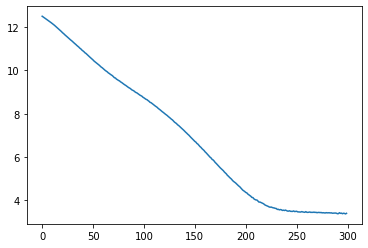

In [89]:
plt.plot(range(epochs),losses)

In [90]:
with torch.no_grad():
    y_val=model(cat_test,con_test)
    loss=torch.sqrt(criterion(y_val,y_test))

In [91]:
loss

tensor(3.3235)

In [97]:
for i in range(10):
    diff=np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i}.) Predicted: {y_val[i].item():8.2f}, True: {y_test[i].item():8.2f}, Diff: {diff:8.2f}')

0.) Predicted:     3.65, True:     2.90, Diff:     0.75
1.) Predicted:    25.62, True:     5.70, Diff:    19.92
2.) Predicted:     6.39, True:     7.70, Diff:     1.31
3.) Predicted:    13.33, True:    12.50, Diff:     0.83
4.) Predicted:     4.75, True:     4.10, Diff:     0.65
5.) Predicted:     5.44, True:     5.30, Diff:     0.14
6.) Predicted:     4.20, True:     3.70, Diff:     0.50
7.) Predicted:    17.66, True:    14.50, Diff:     3.16
8.) Predicted:     7.29, True:     5.70, Diff:     1.59
9.) Predicted:    11.46, True:    10.10, Diff:     1.36


In [98]:
torch.save(model.state_dict(),'my_TaxiModel.pt')